#  PVD - GAPS demonstration

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from rex import NSRDBX, WindX
from rex import Outputs
from rex import Resource

In [11]:
import pvlib
import PVDegradationTools as pvd
from PVDegradationTools.standards import calc_standoff

# PVD - Single location example

In [3]:
#Weather data
nsrdb_fp = '/datasets/NSRDB/current/nsrdb_tmy-2021.h5'

In [4]:
#Spatial data
NREL = (39.741931, -105.169891)

with NSRDBX(nsrdb_fp, hsds=False) as f:
    gid = f.lat_lon_gid(NREL) #get nearest gid
print(gid)

479494


In [5]:
#Perform calculation
res = calc_standoff(nsrdb_fp, hsds=False, gid=gid, tilt=None, azimuth=180, sky_model='isotropic', temp_model='sapm', 
                    module_type='glass_polymer', level=0, x_0=6.1)
print(res)

{'x': 2.459131550393533, 'T98_0': 79.39508117890611, 'T98_inf': 51.07779401289873}


# GAPS - Multiple location post processing

## Standoff - 1D example

In [6]:
out_standoff = "./out_standoff.h5"

with Outputs(out_standoff, mode="r") as out:
    print(out.shapes)
    print(out.units)
    print(out['x', 0])
    standoff = out['x']
    meta_x = out['meta']

{'T98_0': (27,), 'T98_inf': (27,), 'meta': (27,), 'x': (27,)}
{'T98_0': 'Celsius', 'T98_inf': 'Celsius', 'meta': None, 'x': 'cm'}
2.7249792


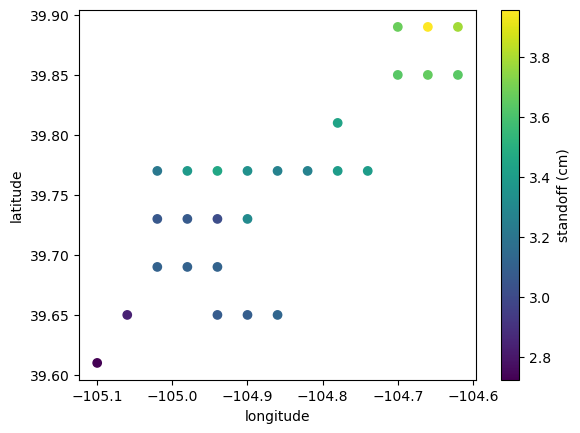

In [7]:
fig, ax = plt.subplots()

sc = ax.scatter(meta_x['longitude'], meta_x['latitude'], c=standoff)

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
cbar = plt.colorbar(sc)
cbar.set_label('standoff (cm)')

plt.show()

## Relative humidity - 2D example

In [8]:
out_rel_hum = "./out_rel_hum.h5"

with Outputs(out_rel_hum, mode="r") as out:
    print(out.shapes)
    print(out.units)
    print(out['RH_back_encap', :, 0])
    meta_RH = out['meta']
    ts = out['time_index']
    RH_back_encap = out['RH_back_encap', :, 0]

{'RH_back_encap': (8760, 27), 'RH_backsheet': (8760, 27), 'RH_front_encap': (8760, 27), 'meta': (27,), 'time_index': (8760,)}
{'RH_back_encap': None, 'RH_backsheet': None, 'RH_front_encap': None, 'meta': None, 'time_index': None}
[0.00973435 0.00973435 0.00973435 ... 0.00973435 0.00973435 0.00973435]


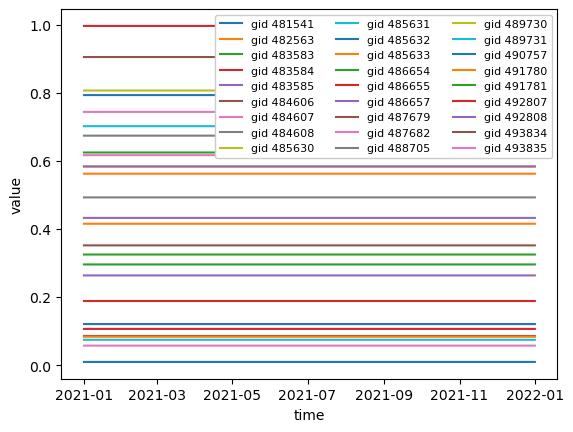

In [9]:
fig, ax = plt.subplots()

with Outputs(out_rel_hum, mode="r") as out:
    for index, row in meta_RH.iterrows():
        ax.plot(ts, out['RH_back_encap', :, index], label='gid {}'.format(meta_RH.iloc[index]['gid']))

ax.set_xlabel('time')
ax.set_ylabel('value')
ax.legend(ncol=3, fontsize=8, framealpha=1)